[tutorial](https://f1000researchdata.s3.amazonaws.com/manuscripts/12222/73fb3b7a-a5ff-45b5-8581-b1699be909c6_8839_-_jovana_maksimovic_v3.pdf?doi=10.12688/f1000research.8839.3&numberOfBrowsableCollections=26&numberOfBrowsableInstitutionalCollections=4&numberOfBrowsableGateways=29)

In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# the URL for the data download
url <- "https://ndownloader.figshare.com/files/7896205"
# download the data
download.file(url, destfile="methylAnalysisDataV3.tar.gz", method="auto")
# extract the data
untar("methylAnalysisDataV3.tar.gz", exdir=".", compressed="gzip")


Warning message:
“untar(compressed=) is deprecated”


In [3]:
# set up a path to the data directory
dataDirectory <- "./data"
# list the files
list.files(dataDirectory, recursive=TRUE)

[1] "48639-non-specific-probes-Illumina450k.csv"
 [2] "5975827018/5975827018_R06C02_Grn.idat"     
 [3] "5975827018/5975827018_R06C02_Red.idat"     
 [4] "6264509100/6264509100_R01C01_Grn.idat"     
 [5] "6264509100/6264509100_R01C01_Red.idat"     
 [6] "6264509100/6264509100_R01C02_Grn.idat"     
 [7] "6264509100/6264509100_R01C02_Red.idat"     
 [8] "6264509100/6264509100_R02C01_Grn.idat"     
 [9] "6264509100/6264509100_R02C01_Red.idat"     
[10] "6264509100/6264509100_R02C02_Grn.idat"     
[11] "6264509100/6264509100_R02C02_Red.idat"     
[12] "6264509100/6264509100_R03C01_Grn.idat"     
[13] "6264509100/6264509100_R03C01_Red.idat"     
[14] "6264509100/6264509100_R03C02_Grn.idat"     
[15] "6264509100/6264509100_R03C02_Red.idat"     
[16] "6264509100/6264509100_R04C01_Grn.idat"     
[17] "6264509100/6264509100_R04C01_Red.idat"     
[18] "6264509100/6264509100_R04C02_Grn.idat"     
[19] "6264509100/6264509100_R04C02_Red.idat"     
[20] "6264509100/6264509100_R05C01_Grn.idat"     
[21] "6264509100/6264509100_R05C01_Red.idat"     
[22] "6264509100/6264509100_R05C02_Grn.idat"     
[23] "6264509100/6264509100_R05C02_Red.idat"     
[24] "6264509100/6264509100_R06C01_Grn.idat"     
[25] "6264509100/6264509100_R06C01_Red.idat"     
[26] "6264509100/6264509100_R06C02_Grn.idat"     
[27] "6264509100/6264509100_R06C02_Red.idat"     
[28] "ageData.RData"                             
[29] "human_c2_v5.rdata"                         
[30] "model-based-cpg-islands-hg19-chr17.txt"    
[31] "SampleSheet.csv"                           
[32] "wgEncodeRegDnaseClusteredV3chr17.bed"

In [4]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install(c("limma", 'minfi', 'IlluminaHumanMethylation450kanno.ilmn12.hg19',
                      'IlluminaHumanMethylation450kmanifest', 'missMethyl', 'minfiData',
                      'Gviz', 'DMRcate'))
install.packages(c('RColorBrewer', 'matrixStats', 'stringr'))                      

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Installing package(s) 'BiocVersion', 'limma', 'minfi',
  'IlluminaHumanMethylation450kanno.ilmn12.hg19',
  'IlluminaHumanMethylation450kmanifest', 'missMethyl', 'minfiData'

also installing the dependencies ‘Rhtslib’, ‘rjson’, ‘filelock’, ‘Rsamtools’, ‘GenomicAlignments’, ‘restfulr’, ‘BiocFileCache’, ‘formatR’, ‘zlibbioc’, ‘rngtools’, ‘BiocIO’, ‘rtracklayer’, ‘biomaRt’, ‘bitops’, ‘XML’, ‘xtable’, ‘lambda.r’, ‘futile.options’, ‘plogr’, ‘png’, ‘TxDb.Hsapiens.UCSC.hg19.knownGene’, ‘XVector’, ‘MatrixGenerics’, ‘foreach’, ‘iterators’, ‘locfit’, ‘matrixStats’, ‘doRNG’, ‘GenomicFeatures’, ‘RCurl’, ‘GenomeInfoDbData’, ‘multtest’, ‘scrime’, ‘base64’, ‘sparseMatrixStats’, ‘annotate’, ‘

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Installing package(s) 'Gviz', 'DMRcate'

also installing the dependencies ‘sass’, ‘jquerylib’, ‘httpuv’, ‘sourcetools’, ‘later’, ‘promises’, ‘bslib’, ‘crosstalk’, ‘checkmate’, ‘htmlwidgets’, ‘shiny’, ‘DT’, ‘lazyeval’, ‘Formula’, ‘htmlTable’, ‘viridis’, ‘interactiveDisplayBase’, ‘R.oo’, ‘R.methodsS3’, ‘AnnotationFilter’, ‘ProtGenerics’, ‘Hmisc’, ‘dichromat’, ‘VariantAnnotation’, ‘jpeg’, ‘AnnotationHub’, ‘gtools’, ‘R.utils’, ‘permute’, ‘beachmat’, ‘ensembldb’, ‘BSgenome’, ‘biovizBase’, ‘latticeExtra’, ‘ExperimentHub’, ‘bsseq’, ‘edgeR’, ‘DSS’


Old packages: 'gert', 'openssl', 'survival'



In [7]:
# load packages required for analysis
library(limma)
library(minfi) 
library(IlluminaHumanMethylation450kanno.ilmn12.hg19) 
library(IlluminaHumanMethylation450kmanifest) 
library(RColorBrewer)
library(missMethyl)
library(matrixStats)
library(minfiData)
library(Gviz)
library(DMRcate)
library(stringr)


Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following object is masked from ‘package:limma’:

    plotMA


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: GenomicRanges

Loading

In [8]:
ann450k <- getAnnotation(IlluminaHumanMethylation450kanno.ilmn12.hg19)
head(ann450k)

DataFrame with 6 rows and 33 columns
                   chr       pos      strand        Name    AddressA
           <character> <integer> <character> <character> <character>
cg00050873        chrY   9363356           -  cg00050873    32735311
cg00212031        chrY  21239348           -  cg00212031    29674443
cg00213748        chrY   8148233           -  cg00213748    30703409
cg00214611        chrY  15815688           -  cg00214611    69792329
cg00455876        chrY   9385539           -  cg00455876    27653438
cg01707559        chrY   6778695           +  cg01707559    45652402
              AddressB              ProbeSeqA              ProbeSeqB
           <character>            <character>            <character>
cg00050873    31717405 ACAAAAAAACAACACACAAC.. ACGAAAAAACAACGCACAAC..
cg00212031    38703326 CCCAATTAACCACAAAAACT.. CCCAATTAACCGCAAAAACT..
cg00213748    36767301 TTTTAACACCTAACACCATT.. TTTTAACGCCTAACACCGTT..
cg00214611    46723459 CTAACTTCCAAACCACACTT.. CTAACTTCCGAACCGCGCTT

In [9]:
targets <- read.metharray.sheet(dataDirectory, pattern='SampleSheet.csv')

[read.metharray.sheet] Found the following CSV files:



[1] "./data/SampleSheet.csv"


In [10]:
targets

Sample_Name,Sample_Well,Sample_Source,Sample_Group,Sample_Label,Pool_ID,Array,Slide,Basename
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A1,M28,naive,naive,NA,R01C01,6264509100,./data/6264509100/6264509100_R01C01
2,B1,M28,rTreg,rTreg,NA,R02C01,6264509100,./data/6264509100/6264509100_R02C01
3,C1,M28,act_naive,act_naive,NA,R03C01,6264509100,./data/6264509100/6264509100_R03C01
4,D1,M29,naive,naive,NA,R04C01,6264509100,./data/6264509100/6264509100_R04C01
5,E1,M29,act_naive,act_naive,NA,R05C01,6264509100,./data/6264509100/6264509100_R05C01
6,F1,M29,act_rTreg,act_rTreg,NA,R06C01,6264509100,./data/6264509100/6264509100_R06C01
7,G1,M30,naive,naive,NA,R01C02,6264509100,./data/6264509100/6264509100_R01C02
8,H1,M30,rTreg,rTreg,NA,R02C02,6264509100,./data/6264509100/6264509100_R02C02
9,A2,M30,act_naive,act_naive,NA,R03C02,6264509100,./data/6264509100/6264509100_R03C02


In [11]:
rgSet <- read.metharray.exp(targets=targets)
rgSet

Warning message in readChar(con, nchars = n):
"truncating string with embedded nuls"
Warning message in readChar(con, nchars = n):
"truncating string with embedded nuls"
Warning message in readChar(con, nchars = n):
"truncating string with embedded nuls"
Warning message in readChar(con, nchars = n):
"truncating string with embedded nuls"
Warning message in readChar(con, nchars = n):
"truncating string with embedded nuls"
Warning message in readChar(con, nchars = n):
"truncating string with embedded nuls"
Warning message in readChar(con, nchars = n):
"truncating string with embedded nuls"
Warning message in readChar(con, nchars = n):
"truncating string with embedded nuls"
Warning message in readChar(con, nchars = n):
"truncating string with embedded nuls"
Warning message in readChar(con, nchars = n):
"truncating string with embedded nuls"
Warning message in readChar(con, nchars = n):
"truncating string with embedded nuls"
Warning message in readChar(con, nchars = n):
"truncating string 

class: RGChannelSet 
dim: 622399 11 
metadata(0):
assays(2): Green Red
rownames(622399): 10600313 10600322 ... 74810490 74810492
rowData names(0):
colnames(11): 6264509100_R01C01 6264509100_R02C01 ... 6264509100_R04C02
  5975827018_R06C02
colData names(10): Sample_Name Sample_Well ... Basename filenames
Annotation
  array: IlluminaHumanMethylation450k
  annotation: ilmn12.hg19

In [12]:
targets$ID <- paste(targets$Sample_Group, targets$Sample_Name, sep='.')
sampleNames(rgSet) <- targets$ID
rgSet

class: RGChannelSet 
dim: 622399 11 
metadata(0):
assays(2): Green Red
rownames(622399): 10600313 10600322 ... 74810490 74810492
rowData names(0):
colnames(11): naive.1 rTreg.2 ... act_rTreg.10 birth.11
colData names(10): Sample_Name Sample_Well ... Basename filenames
Annotation
  array: IlluminaHumanMethylation450k
  annotation: ilmn12.hg19

## Quality Control

1) detection p-values -> for every CpG in every sample, which is indicative of the quality of the signal; compares the total signal (M + U) for each probe to the background signal level, which is estimated from the -ve control probes. Very small p-values are indicative of a reliable signal whilst large p-values, for eg > 0.01, generally indicate a poor quality signal

plotting the mean detection p-values for each sample allows us to gauge the general quality of the samples in terms of the overall signal reliability. Samples that have many failed probes will have relatively large mean detection p-values



In [13]:
detP <- detectionP(rgSet)
head(detP)

,naive.1,rTreg.2,act_naive.3,naive.4,act_naive.5,act_rTreg.6,naive.7,rTreg.8,act_naive.9,act_rTreg.10,birth.11
cg00050873,0.000000e+00,0.000000e+00,0.000000e+00,0.00000e+00,0.000000e+00,0.000000e+00,0.00000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cg00212031,0.000000e+00,0.000000e+00,0.000000e+00,0.00000e+00,0.000000e+00,0.000000e+00,0.00000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.638199e-237
cg00213748,2.139652e-88,4.213813e-31,1.181802e-12,1.29802e-47,8.255482e-15,2.592206e-23,1.16160e-28,1.469801e-05,1.543654e-21,1.365951e-08,6.735224e-01
cg00214611,0.000000e+00,0.000000e+00,0.000000e+00,0.00000e+00,0.000000e+00,0.000000e+00,0.00000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.344451e-01
cg00455876,1.400696e-234,9.349236e-111,4.272105e-90,0.00000e+00,3.347145e-268,4.690740e-308,1.08647e-219,5.362780e-178,0.000000e+00,7.950724e-295,4.403634e-174
cg01707559,0.000000e+00,0.000000e+00,0.000000e+00,0.00000e+00,0.000000e+00,0.000000e+00,0.00000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Warning message in plot.window(xlim, ylim, log = log, ...):
""ex.names" is not a graphical parameter"
Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
""ex.names" is not a graphical parameter"
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
""ex.names" is not a graphical parameter"
Warning message in axis(if (horiz) 1 else 2, cex.axis = cex.axis, ...):
""ex.names" is not a graphical parameter"


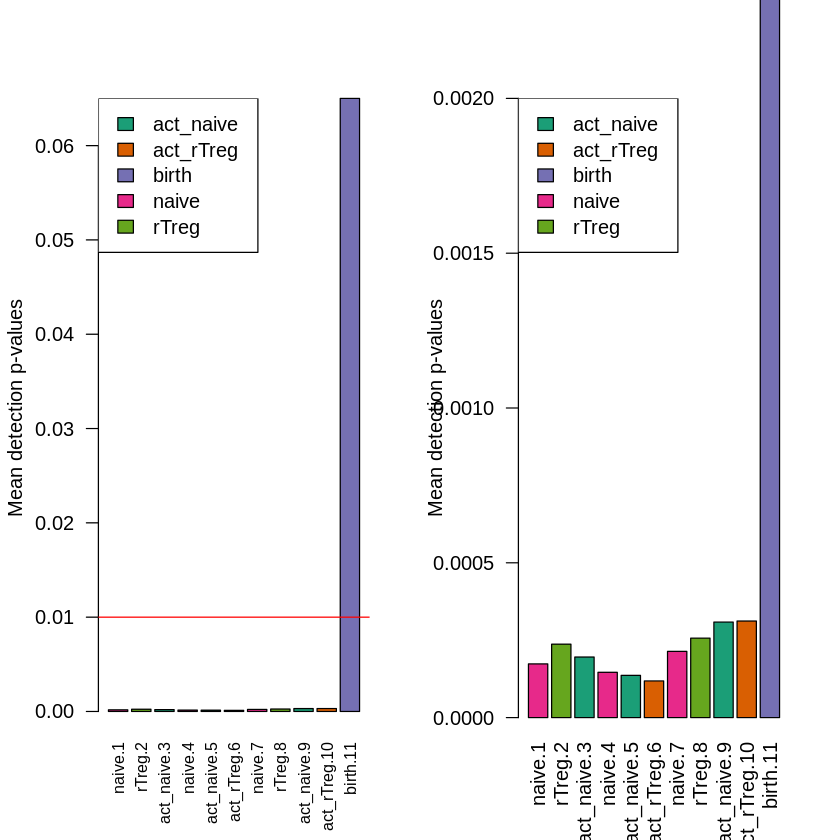

In [14]:
# examine mean detection p-values across all samples to identify any failed samples

pal <- brewer.pal(8, 'Dark2')
par(mfrow=c(1, 2))
barplot(colMeans(detP), col=pal[factor(targets$Sample_Group)], las=2,
        cex.names=0.8, ylab='Mean detection p-values')
abline(h=0.01, col='red')
legend('topleft', legend=levels(factor(targets$Sample_Group)), fill=pal,
        bg='white')
barplot(colMeans(detP), col=pal[factor(targets$Sample_Group)], las=2,
        ex.names=0.8, ylim=c(0, 0.002), ylab='Mean detection p-values')
legend('topleft', legend=levels(factor(targets$Sample_Group)), fill=pal,
        bg='white')                        

In [15]:
qcReport(rgSet, sampNames=targets$ID, sampGroups = targets$Sample_Group, pdf='qcReport.pdf')

Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning me

png 
  2

In [16]:
# remove poor quality samples
keep <- colMeans(detP) < 0.05
rgSet <- rgSet[, keep]
rgSet

class: RGChannelSet 
dim: 622399 10 
metadata(0):
assays(2): Green Red
rownames(622399): 10600313 10600322 ... 74810490 74810492
rowData names(0):
colnames(10): naive.1 rTreg.2 ... act_naive.9 act_rTreg.10
colData names(10): Sample_Name Sample_Well ... Basename filenames
Annotation
  array: IlluminaHumanMethylation450k
  annotation: ilmn12.hg19

In [17]:
# remove poor quality samples from targets data
targets <- targets[keep,]
targets[, 1:5]

,Sample_Name,Sample_Well,Sample_Source,Sample_Group,Sample_Label
,<int>,<chr>,<chr>,<chr>,<chr>
1,1,A1,M28,naive,naive
2,2,B1,M28,rTreg,rTreg
3,3,C1,M28,act_naive,act_naive
4,4,D1,M29,naive,naive
5,5,E1,M29,act_naive,act_naive
6,6,F1,M29,act_rTreg,act_rTreg
7,7,G1,M30,naive,naive
8,8,H1,M30,rTreg,rTreg
9,9,A2,M30,act_naive,act_naive


In [18]:
# remove poor quality samples from detection p-value table
detP <- detP[, keep]
dim(detP)

[1] 485512     10

## Normalization

`preprocessFunnorm` is most appropriate for datasets w/ global methylation differences such as cancer/normal or vastly different tissue types, 

`preprocessQuantile` is more suited for datasets where you don't expect global differences between your samples, for eg a single tissue

as we're comparing different blood cell types, which are globally relatively similar, we'll apply `preprocessQuantile` method to our data

-> stratified quantile normalisation procedure which is applied to the methylated and unmethylated signal intensities separately, and takes into account the different probe types

In [19]:
mSetSq <- preprocessQuantile(rgSet)

[preprocessQuantile] Mapping to genome.

Warning message in .getSex(CN = CN, xIndex = xIndex, yIndex = yIndex, cutoff = cutoff):
"An inconsistency was encountered while determining sex. One possibility is that only one sex is present. We recommend further checks, for example with the plotSex function."
[preprocessQuantile] Fixing outliers.

[preprocessQuantile] Quantile normalizing.



In [20]:
# create a MethylSet object from the raw data for plotting
mSetRaw <- preprocessRaw(rgSet)

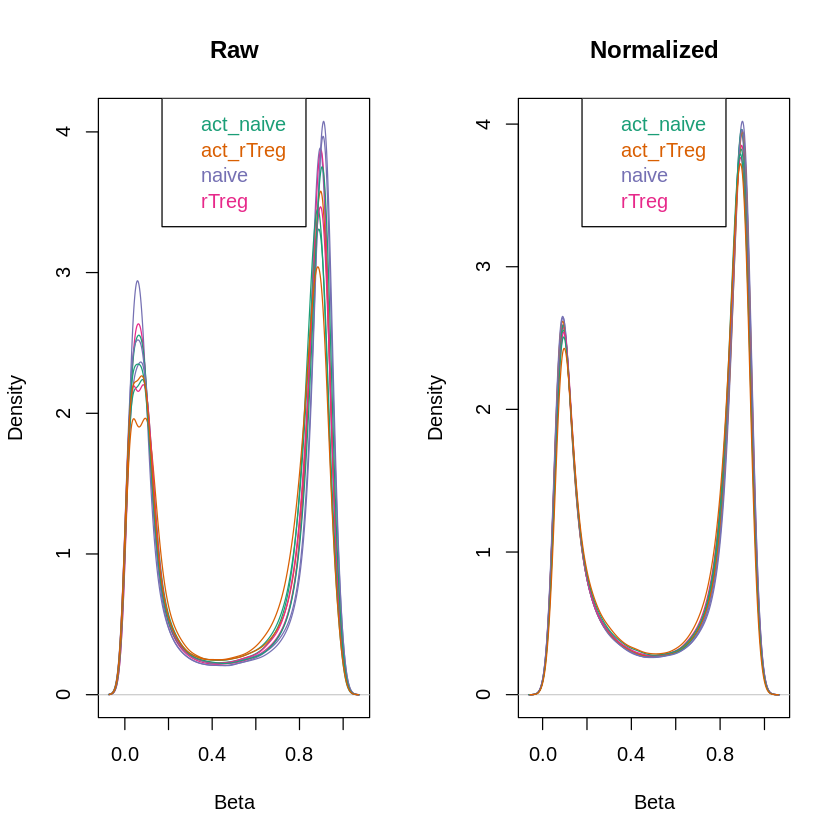

In [21]:
# visualise what the data looks like before and after normalisation
par(mfrow=c(1,2))
densityPlot(rgSet, sampGroups=targets$Sample_Group,main="Raw", legend=FALSE)
legend("top", legend = levels(factor(targets$Sample_Group)),
       text.col=brewer.pal(8,"Dark2"))
densityPlot(getBeta(mSetSq), sampGroups=targets$Sample_Group,
            main="Normalized", legend=FALSE)
legend("top", legend = levels(factor(targets$Sample_Group)),
       text.col=brewer.pal(8,"Dark2"))

## Data Exploration


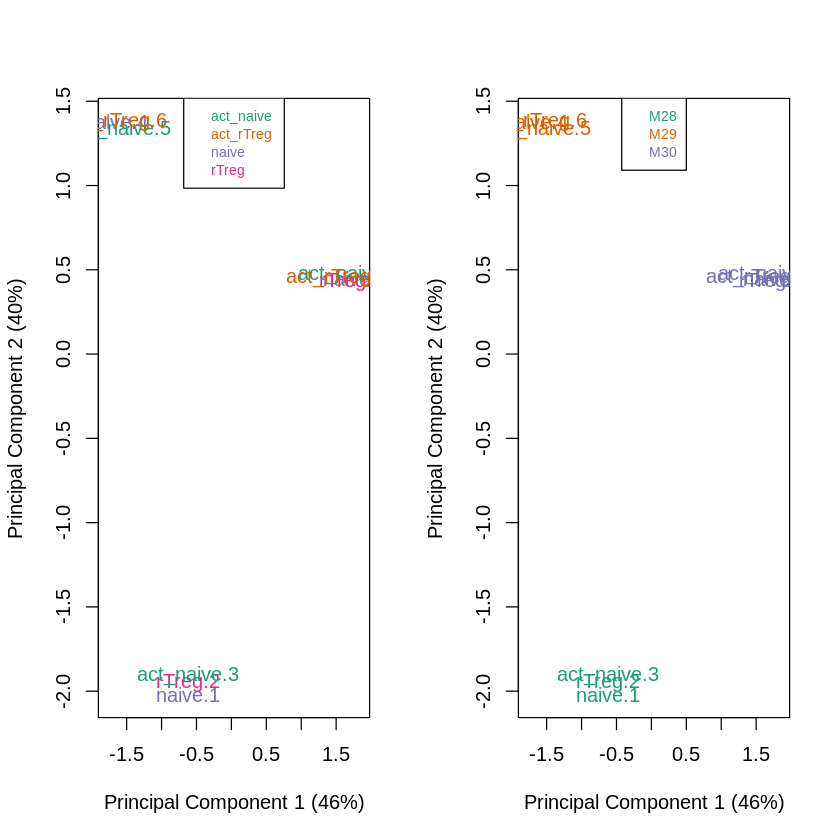

In [22]:
# MDS plots to look at largest sources of variation
par(mfrow=c(1,2))
plotMDS(getM(mSetSq), top=1000, gene.selection="common",
        col=pal[factor(targets$Sample_Group)])
legend("top", legend=levels(factor(targets$Sample_Group)), text.col=pal,
       bg="white", cex=0.7)
plotMDS(getM(mSetSq), top=1000, gene.selection="common",
        col=pal[factor(targets$Sample_Source)])
legend("top", legend=levels(factor(targets$Sample_Source)), text.col=pal,
       bg="white", cex=0.7)

The largest source of variation is the difference between individuals. The higher dimensions reveal that the differences between cell types are largely capture dby the third and fourth PC. This type of information is useful in that it can inform downstream analysis. If obvious sources of unwanted variation are revealed by the MDS plots, we can include them in our statistical model to account for them. In the case of this particular dataset, we will include individual to individual variation in our statistical model

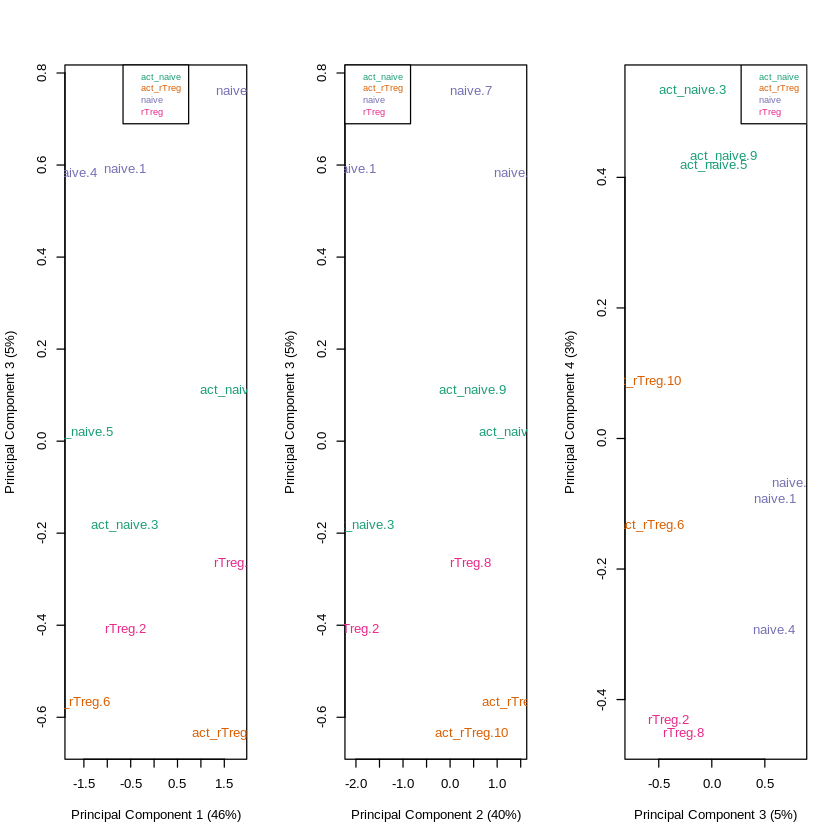

In [23]:
# Examine higher dimensions to look at other sources of variation
par(mfrow=c(1,3))
plotMDS(getM(mSetSq), top=1000, gene.selection="common",
        col=pal[factor(targets$Sample_Group)], dim=c(1,3))
legend("top", legend=levels(factor(targets$Sample_Group)), text.col=pal,
       cex=0.7, bg="white")
plotMDS(getM(mSetSq), top=1000, gene.selection="common",
        col=pal[factor(targets$Sample_Group)], dim=c(2,3))
legend("topleft", legend=levels(factor(targets$Sample_Group)), text.col=pal,
       cex=0.7, bg="white")
plotMDS(getM(mSetSq), top=1000, gene.selection="common",
        col=pal[factor(targets$Sample_Group)], dim=c(3,4))
legend("topright", legend=levels(factor(targets$Sample_Group)), text.col=pal,
       cex=0.7, bg="white")

## Filtering

poor performing probes are generally filtered out priort to differential methylation analysis. As the signal from these probes is unreliable, by removing them we perform fewer statistical tests and thus incur a reduced multiple testing penalty. We filter out probes that have failed in one or more samples based on detection p-value

In [24]:
# ensure probes are in the same order in the mSetSq and detP objects
detP <- detP[match(featureNames(mSetSq),rownames(detP)),]
# remove any probes that have failed in one or more samples
keep <- rowSums(detP < 0.01) == ncol(mSetSq)
table(keep)

keep
 FALSE   TRUE 
   977 484535 

In [25]:
mSetSqFlt <- mSetSq[keep,]
mSetSqFlt

class: GenomicRatioSet 
dim: 484535 10 
metadata(0):
assays(2): M CN
rownames(484535): cg13869341 cg14008030 ... cg08265308 cg14273923
rowData names(0):
colnames(10): naive.1 rTreg.2 ... act_naive.9 act_rTreg.10
colData names(13): Sample_Name Sample_Well ... yMed predictedSex
Annotation
  array: IlluminaHumanMethylation450k
  annotation: ilmn12.hg19
Preprocessing
  Method: Raw (no normalization or bg correction)
  minfi version: 1.38.0
  Manifest version: 0.4.0

Depending on the nature of your samples and your biological question you may also choose to filter out the probes from the X and Y chromosomes or probes that are known to have common SNPs at the CpG site. As the samples in this dataset were all derived from male donors, we will not be removing the sex chromosome probes as part of this analysis, however example code is provided below. A different dataset, which contains both male and female samples, is used to demonstrate a Differential Variability analysis and provides an example of when sex chromosome removal is necessary

In [27]:
# if your data includes males and females, remove probes on the sex chromosomes
keep <- !(featureNames(mSetSqFlt) %in% ann450k$Name[ann450k$chr %in% c('chrX', 'chrY')])
table(keep)
mSetSqFlt <- mSetSqFlt[keep,]

keep
 FALSE   TRUE 
 11608 472927 

In [28]:
# remove probes w/ SNPs at CpG site
mSetSqFlt <- dropLociWithSnps(mSetSqFlt)
mSetSqFlt

class: GenomicRatioSet 
dim: 455924 10 
metadata(0):
assays(2): M CN
rownames(455924): cg13869341 cg14008030 ... cg07660283 cg09226288
rowData names(0):
colnames(10): naive.1 rTreg.2 ... act_naive.9 act_rTreg.10
colData names(13): Sample_Name Sample_Well ... yMed predictedSex
Annotation
  array: IlluminaHumanMethylation450k
  annotation: ilmn12.hg19
Preprocessing
  Method: Raw (no normalization or bg correction)
  minfi version: 1.38.0
  Manifest version: 0.4.0

In [31]:
# exclude cross reactive probes
# exclude cross reactive probes
xReactiveProbes <- read.csv(file=paste(dataDirectory, "48639-non-specific-probes-Illumina450k.csv",
                            sep="/"), stringsAsFactors=FALSE)
keep <- !(featureNames(mSetSqFlt) %in% xReactiveProbes$TargetID)
table(keep)

keep
 FALSE   TRUE 
 26527 429397 

In [32]:
mSetSqFlt <- mSetSqFlt[keep,]
mSetSqFlt

class: GenomicRatioSet 
dim: 429397 10 
metadata(0):
assays(2): M CN
rownames(429397): cg13869341 cg24669183 ... cg19565306 cg09226288
rowData names(0):
colnames(10): naive.1 rTreg.2 ... act_naive.9 act_rTreg.10
colData names(13): Sample_Name Sample_Well ... yMed predictedSex
Annotation
  array: IlluminaHumanMethylation450k
  annotation: ilmn12.hg19
Preprocessing
  Method: Raw (no normalization or bg correction)
  minfi version: 1.38.0
  Manifest version: 0.4.0

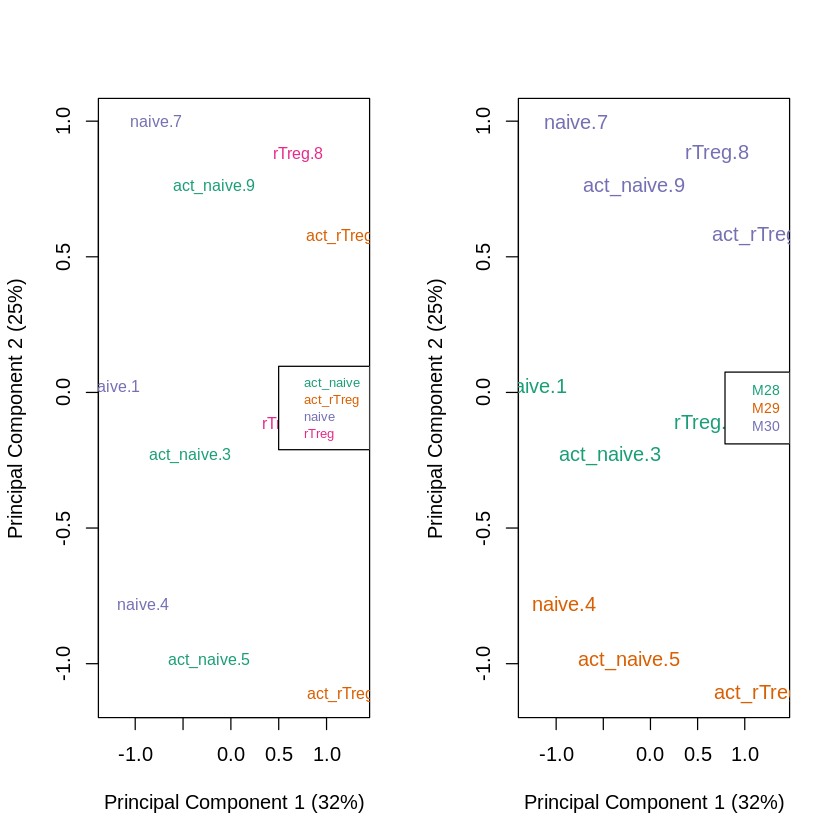

In [33]:
par(mfrow=c(1,2))
plotMDS(getM(mSetSqFlt), top=1000, gene.selection="common",
        col=pal[factor(targets$Sample_Group)], cex=0.8)
legend("right", legend=levels(factor(targets$Sample_Group)), text.col=pal,
       cex=0.65, bg="white")
plotMDS(getM(mSetSqFlt), top=1000, gene.selection="common",
        col=pal[factor(targets$Sample_Source)])
legend("right", legend=levels(factor(targets$Sample_Source)), text.col=pal,
       cex=0.7, bg="white")

Once the data has been filtered and normalised, it is often useful to re-examine the MDS plots to see if the relationship between the samples has changed. It is apparent from the new MDS plots that much of the inter-individual variation has been removed as this is no longer the first principal component (Figure 6), likely due to the removal of the SNP-affected CpG probes. However, the samples do still cluster by individual in the second dimension (Figure 6 and Figure 7) and thus a factor for individual should still be included in the model.


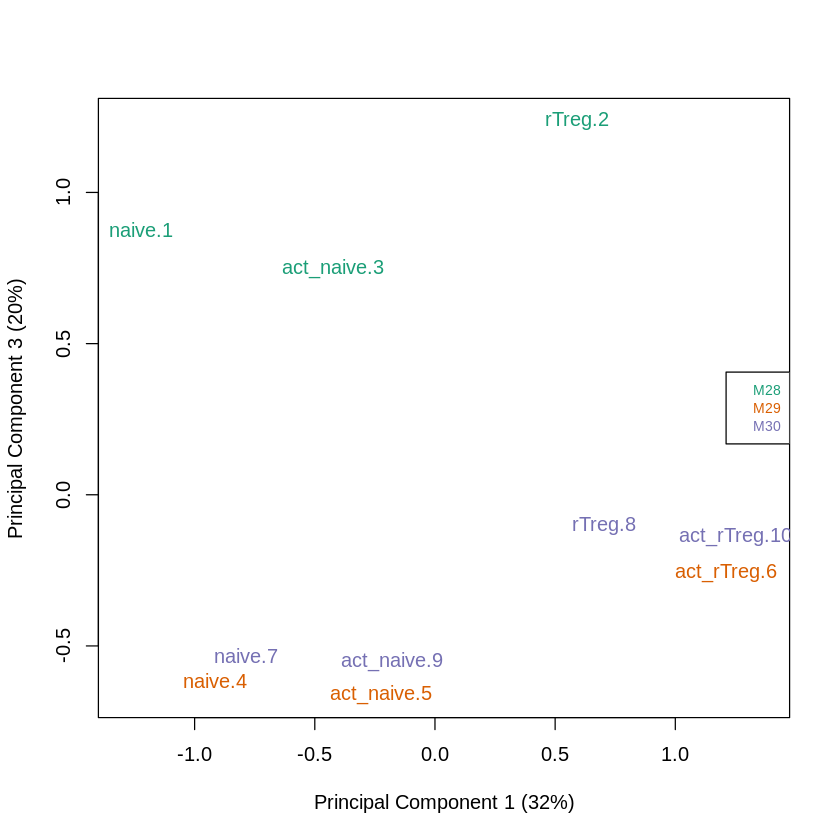

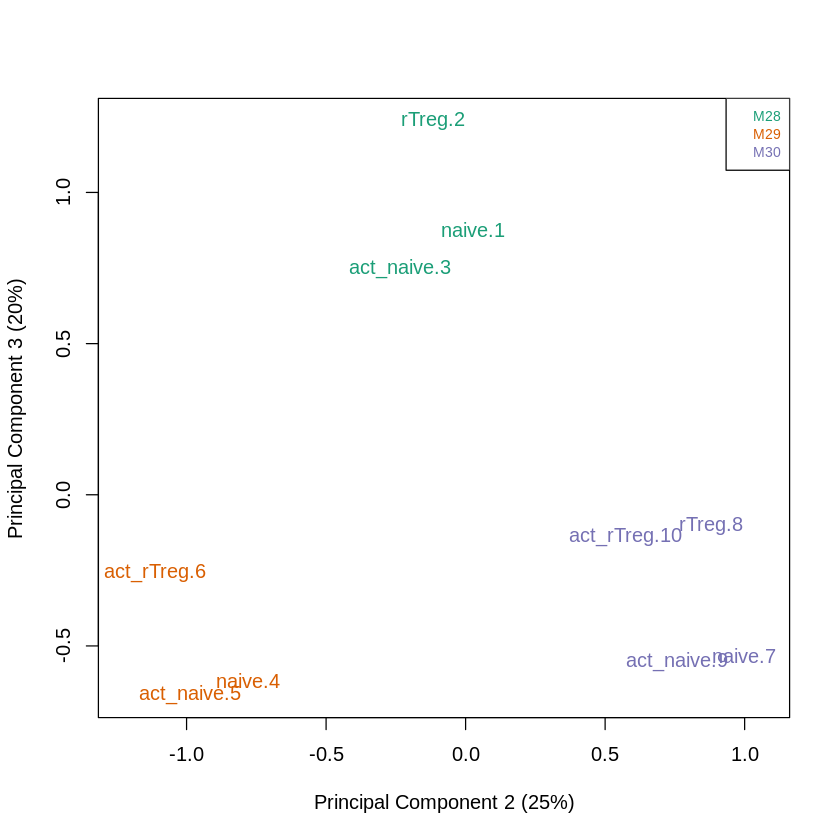

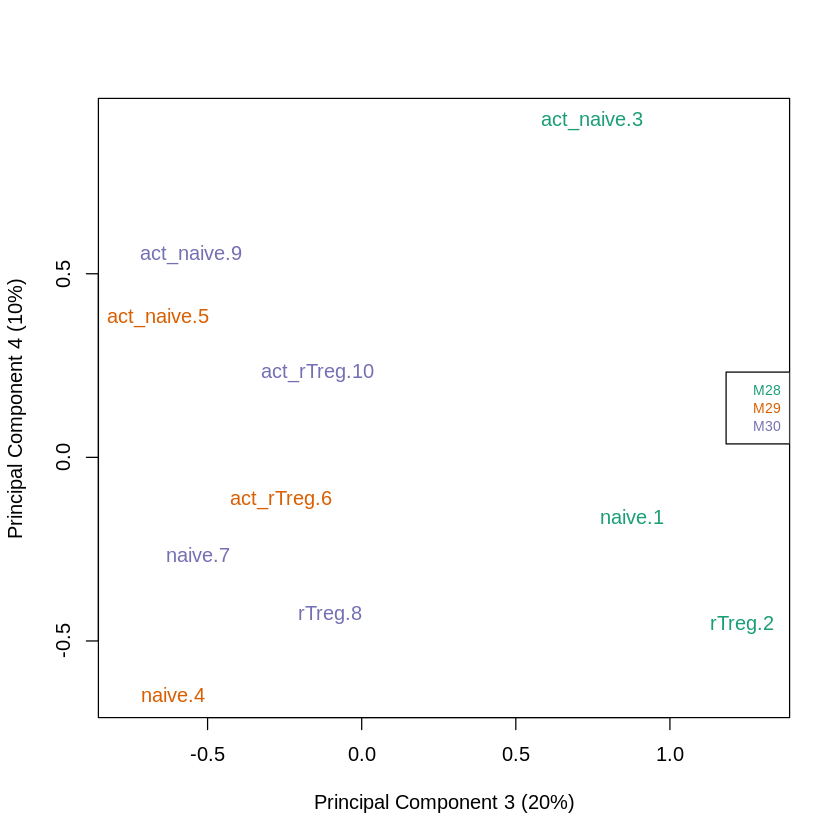

In [35]:
# Examine higher dimensions to look at other sources of variation plotMDS(getM(mSetSqFlt), top=1000, gene.selection="common",
plotMDS(getM(mSetSqFlt), top=1000, gene.selection = 'common',
        col=pal[factor(targets$Sample_Source)], dim=c(1,3))
legend("right", legend=levels(factor(targets$Sample_Source)), text.col=pal,
       cex=0.7, bg="white")
plotMDS(getM(mSetSqFlt), top=1000, gene.selection="common",
        col=pal[factor(targets$Sample_Source)], dim=c(2,3))
legend("topright", legend=levels(factor(targets$Sample_Source)), text.col=pal,
       cex=0.7, bg="white")
plotMDS(getM(mSetSqFlt), top=1000, gene.selection="common",
        col=pal[factor(targets$Sample_Source)], dim=c(3,4))
legend("right", legend=levels(factor(targets$Sample_Source)), text.col=pal,
       cex=0.7, bg="white")

In [36]:
# Calculate M-values for statistical analysis
mVals <- getM(mSetSqFlt)
head(mVals[, 1:5])

,naive.1,rTreg.2,act_naive.3,naive.4,act_naive.5
cg13869341,2.421276,2.515948,2.165745,2.286314,2.109441
cg24669183,2.169414,2.235964,2.280734,1.632309,2.184435
cg15560884,1.761176,1.577578,1.597503,1.777486,1.764999
cg01014490,-3.504268,-3.825119,-5.384735,-4.537864,-4.296526
cg17505339,3.082191,3.924931,4.163206,3.255373,3.654134
cg11954957,1.546401,1.912204,1.727910,2.441267,1.618331


In [37]:
bVals <- getBeta(mSetSqFlt)
head(bVals[, 1:5])

,naive.1,rTreg.2,act_naive.3,naive.4,act_naive.5
cg13869341,0.84267937,0.85118462,0.8177504,0.82987650,0.81186174
cg24669183,0.81812908,0.82489238,0.8293297,0.75610281,0.81967323
cg15560884,0.77219626,0.74903910,0.7516263,0.77417882,0.77266205
cg01014490,0.08098986,0.06590459,0.0233755,0.04127262,0.04842397
cg17505339,0.89439216,0.93822870,0.9471357,0.90520570,0.92641305
cg11954957,0.74495496,0.79008516,0.7681146,0.84450764,0.75431167


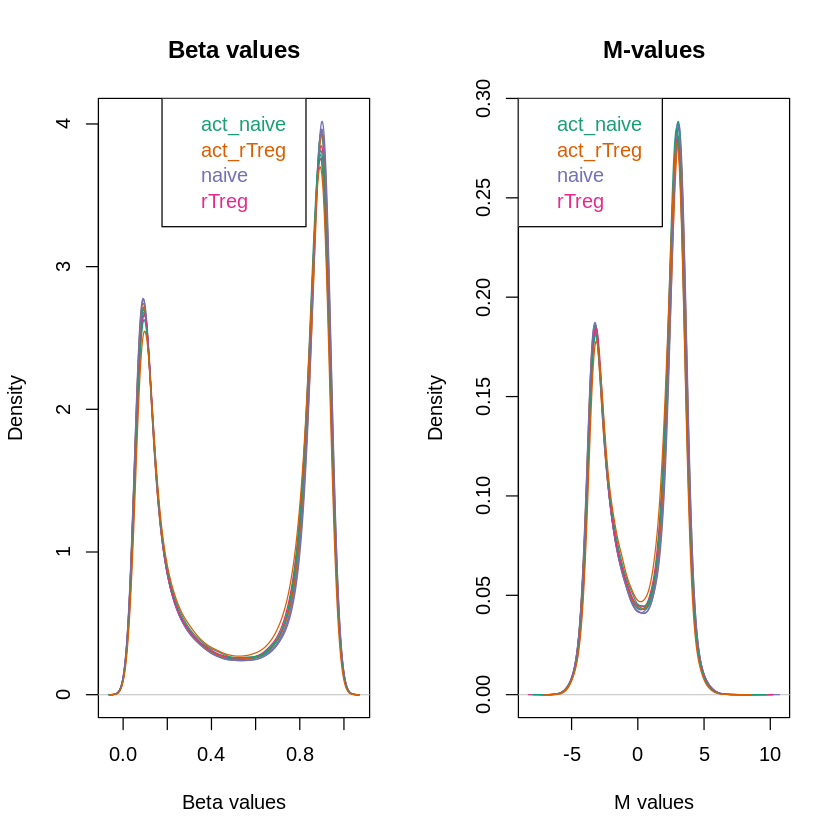

In [39]:
par(mfrow=c(1,2))
densityPlot(bVals, sampGroups=targets$Sample_Group, main="Beta values",
            legend=FALSE, xlab="Beta values")
legend("top", legend = levels(factor(targets$Sample_Group)),
       text.col=brewer.pal(8,"Dark2"))
densityPlot(mVals, sampGroups=targets$Sample_Group, main='M-values',
            legend=FALSE, xlab="M values")
legend("topleft", legend = levels(factor(targets$Sample_Group)),
       text.col=brewer.pal(8,"Dark2"))

## Probe-wise differential methylation analysis

biological qn: discover differentially methylated probes between the different cell types. Yet, as was apparent in the MDS plots, there's another factor that we need to take into account when we perofrm the stats analysis. In the `targets` file, there is a column called Sample_Source, which refers to the individuals that the samples were collected from. In this dataset, each of the individuals contributes more than one cell type. For example, individual M28 contributes `naive`, `rTreg` and `act_naive` samples. Hence, when we specify our design matrix, we need to include two factors: individual and cell type. This style of analysis is called a paired analysis; differences between cell types are calculated within each individual, and then these differences are averaged across individuals to determine whether there is an overall significant difference in the mean methylation level for each CpG site. The limma User’s Guide extensively covers the different types of designs that are commonly used for microarray experiments and how to analyse them in R.

We are interested in pairwise comparisons between the four cell types, taking into account individual to individual variation. We perform this analysis on the matrix of M-values in limma, obtaining moderated t-statistics and associated p-values for each CpG site. A convenient way to set up the model when the user has many comparisons of interest that they would like to test is to use a contrasts matrix in conjunction with the design matrix. A contrasts matrix will take linear combinations of the columns of the design matrix corresponding to the comparisons of interest.

Since we are performing hundreds of thousands of hypothesis tests, we need to adjust the p-values for multiple testing. A common procedure for assessing how statistically significant a change in mean levels is between two groups when a very large number of tests is being performed is to assign a cut-off on the false discovery rate (Benjamini & Hochberg, 1995), rather than on the unadjusted p-value. Typically 5% FDR is used, and this is interpreted as the researcher willing to accept that from the list of significant differentially methylated CpG sites, 5% will be false discoveries. If the p-values are not adjusted for multiple testing, the number of false discoveries will be unacceptably high. For this dataset, assuming a Type I error rate of 5%, we would expect to see 0.05*439918=21996 statistical significant results for a given comparison, even if there were truly no differentially methylated CpG sites.

In [40]:
# factor of interest
cellType <- factor(targets$Sample_Group)

# individual effect that we need to account for
individual <- factor(targets$Sample_Source)

# use the above to create a design matrix
design <- model.matrix(~0 + cellType + individual, data=targets)
colnames(design) <- c(levels(cellType), levels(individual)[-1])

# fit the linear model
fit <- lmFit(mVals, design)

# create a contrast matrix for specific comparisons
contMatrix <- makeContrasts(naive-rTreg,
                            naive-act_naive,
                            rTreg-act_rTreg,
                            act_naive-act_rTreg,
                            levels=design)

contMatrix

,naive - rTreg,naive - act_naive,rTreg - act_rTreg,act_naive - act_rTreg
act_naive,0,-1,0,1
act_rTreg,0,0,-1,-1
naive,1,1,0,0
rTreg,-1,0,1,0
M29,0,0,0,0
M30,0,0,0,0


In [41]:
# fit the contrasts
fit2 <- contrasts.fit(fit, contMatrix)
fit2 <- eBayes(fit2)

In [42]:
# look at the numbers of DM CpGs at FDR < 0.05
summary(decideTests(fit2))

       naive - rTreg naive - act_naive rTreg - act_rTreg act_naive - act_rTreg
Down            1606               408                 0                   552
NotSig        426397            428759            429397                427943
Up              1394               230                 0                   902

In [44]:
# get the table of resutls for the first contrast (naive - rTreg)
ann450kSub <- ann450k[match(rownames(mVals), ann450k$Name),
              c(1:4, 12:19, 24:ncol(ann450k))]

DMPs <- topTable(fit2, num=Inf, coef=1, genelist=ann450kSub)
head(DMPs)

,chr,pos,strand,Name,Probe_rs,Probe_maf,CpG_rs,CpG_maf,SBE_rs,SBE_maf,⋯,HMM_Island,Regulatory_Feature_Name,Regulatory_Feature_Group,DHS,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cg07499259,chr1,12188502,+,cg07499259,NA,NA,NA,NA,NA,NA,⋯,1:12111023-12111225,,,,3.654104,2.46652171,18.77533,7.038346e-08,0.005176247,7.491458
cg26992245,chr8,29848579,-,cg26992245,NA,NA,NA,NA,NA,NA,⋯,,,,,4.450696,-0.09180715,18.35830,8.386780e-08,0.005176247,7.394212
cg09747445,chr15,70387268,-,cg09747445,NA,NA,NA,NA,NA,NA,⋯,,,,,-3.337299,-0.25201484,-18.29169,8.627940e-08,0.005176247,7.378282
cg18808929,chr8,61825469,-,cg18808929,NA,NA,NA,NA,NA,NA,⋯,,,,,-2.990263,0.77522878,-17.95543,9.970727e-08,0.005176247,7.296126
cg25015733,chr2,99342986,-,cg25015733,NA,NA,NA,NA,NA,NA,⋯,,,,,-3.054336,0.83280190,-17.37376,1.288536e-07,0.005176247,7.146883
cg21179654,chr3,114057297,+,cg21179654,NA,NA,NA,NA,NA,NA,⋯,,3:114057192-114057775,Unclassified_Cell_type_specific,,2.859016,1.32460816,17.33058,1.313725e-07,0.005176247,7.135430


$cg07499259
NULL

$cg26992245
NULL

$cg09747445
NULL

$cg18808929
NULL

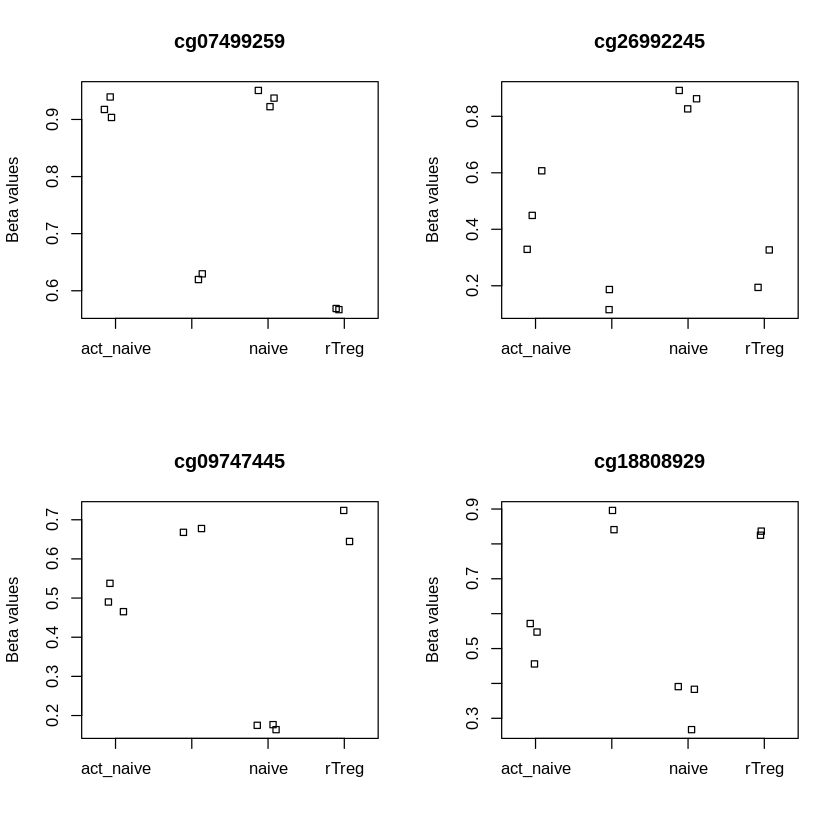

In [45]:
# plot the top4 most significantly differentially methylated CpGs
par(mfrow=c(2, 2))
sapply(rownames(DMPs)[1:4], function(cpg) {
  plotCpg(bVals, cpg=cpg, pheno=targets$Sample_Group, ylab='Beta values')
})

## Differential Methylation analysis of regions

Although performing a probe-wise analysis is useful and informative, sometimes we are interested in knowing whether several proximal CpGs are concordantly differentially methylated, that is, we want to identify differentially methyl- ated regions. There are several Bioconductor packages that have functions for identifying differentially methylated regions from 450k data. Some of the most popular are the dmrFind function in the charm package, which has been somewhat superseded for 450k arrays by the bumphunter function in minfi(Aryee et al., 2014; Jaffe et al., 2012), and, the recently published dmrcate in the DMRcate package (Peters et al., 2015). They are each based on different statistical methods. In our experience, the bumphunter and dmrFind functions can be somewhat slow to run unless you have the computer infrastructure to parallelise them, as they use permutations to assign significance. In this workflow, we will perform an analysis using the dmrcate. As it is based on limma, we can directly use the design and contMatrix we previously defined.

Firstly, our matrix of M-values is annotated with the relevant information about the probes such as their genomic position, gene annotation, etc. By default, this is done using the ilmn12.hg19 annotation, but this can be substituted for any argument compatible with the interface provided by the minfi package. The limma pipeline is then used for differential methylation analysis to calculate moderated t-statistics.

In [46]:
myAnnotation <- cpg.annotate(object = mVals, datatype = 'array', what = 'M',
                              analysis.type = 'differential', design = design,
                              contrasts = T, cont.matrix = contMatrix,
                              coef = 'naive - rTreg', arrayType = '450K')
                              

Your contrast returned 2823 individually significant probes. We recommend the default setting of pcutoff in dmrcate().



In [47]:
str(myAnnotation)

Formal class 'CpGannotated' [package "DMRcate"] with 1 slot
  ..@ ranges:Formal class 'GRanges' [package "GenomicRanges"] with 7 slots
  .. .. ..@ seqnames       :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. .. .. ..@ values         : Factor w/ 22 levels "chr1","chr2",..: 1 2 3 4 5 6 7 8 9 10 ...
  .. .. .. .. ..@ lengths        : int [1:22] 39169 29222 21507 17191 20576 29808 24078 17402 8198 20426 ...
  .. .. .. .. ..@ elementMetadata: NULL
  .. .. .. .. ..@ metadata       : list()
  .. .. ..@ ranges         :Formal class 'IRanges' [package "IRanges"] with 6 slots
  .. .. .. .. ..@ start          : int [1:400448] 15865 534242 710097 714177 720865 758829 779995 805102 805338 805541 ...
  .. .. .. .. ..@ width          : int [1:400448] 1 1 1 1 1 1 1 1 1 1 ...
  .. .. .. .. ..@ NAMES          : chr [1:400448] "cg13869341" "cg24669183" "cg15560884" "cg01014490" ...
  .. .. .. .. ..@ elementType    : chr "ANY"
  .. .. .. .. ..@ elementMetadata: NULL
  .. .. .. .. ..@ meta

In [49]:
# combine the relevant stats for individual CpGs to identify differentially methylated regions
DMRs <- dmrcate(myAnnotation, lambda=1000, C=2)
head(DMRs$results)

Fitting chr1...

Fitting chr2...

Fitting chr3...

Fitting chr4...

Fitting chr5...

Fitting chr6...

Fitting chr7...

Fitting chr8...

Fitting chr9...

Fitting chr10...

Fitting chr11...

Fitting chr12...

Fitting chr13...

Fitting chr14...

Fitting chr15...

Fitting chr16...

Fitting chr17...

Fitting chr18...

Fitting chr19...

Fitting chr20...

Fitting chr21...

Fitting chr22...

Demarcating regions...

Done!



ERROR: ignored

In [50]:
# convert the regions to annotated genomic ranges
data(dmrcatedata)
results.ranges <- extractRanges(DMRs, genome='hg19')

Warning message in data(dmrcatedata):
"data set 'dmrcatedata' not found"
snapshotDate(): 2021-05-18

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Installing package(s) 'DMRcatedata'

Old packages: 'gert', 'openssl', 'survival'

see ?DMRcatedata and browseVignettes('DMRcatedata') for documentation

downloading 1 resources

retrieving 1 resource

loading from cache



In [51]:
# set up the grouping variables and colours
groups <- pal[1:length(unique(targets$Sample_Group))]
names(groups) <- levels(factor(targets$Sample_Group))
cols <- groups[as.character(factor(targets$Sample_Group))]
samps <- 1:nrow(targets)

snapshotDate(): 2021-05-18

see ?DMRcatedata and browseVignettes('DMRcatedata') for documentation

downloading 1 resources

retrieving 1 resource

loading from cache



ERROR: ignored

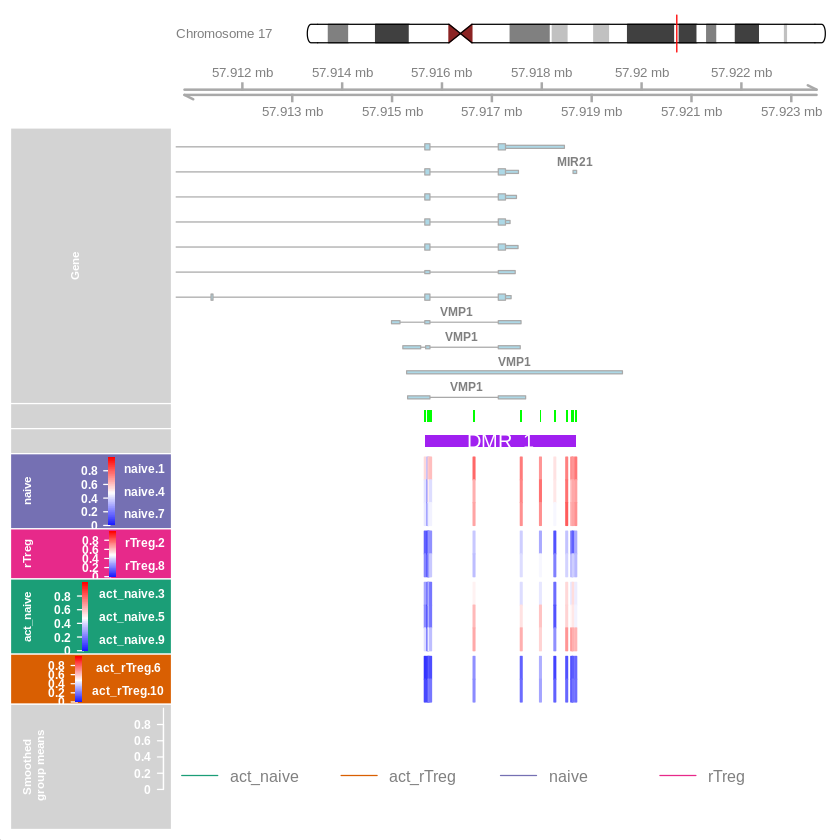

In [52]:
par(mfrow=c(1, 1))
DMR.plot(ranges=results.ranges, dmr=1, CpGs=bVals, phen.col=cols, what = 'Beta',
        arraytype='450K', pch=16, toscale=T, plotmedians=T,
        genome='hg19', sampls=samps)

## Customising visualization of methylation data

In [55]:
# indicate which genome is being used
gen <- "hg19"
# the index of the DMR that we will plot
dmrIndex <- 1
# extract chromosome number and location from DMR results 
coords <- strsplit2(DMRs$results$coord[dmrIndex],":") 
chrom <- coords[1]
start <- as.numeric(strsplit2(coords[2],"-")[1])
end <- as.numeric(strsplit2(coords[2],"-")[2])
# add 25% extra space to plot
minbase <- start - (0.25*(end-start))
maxbase <- end + (0.25*(end-start))

ERROR: ignored

In [57]:
extractRanges(DMRs)

snapshotDate(): 2021-05-18

see ?DMRcatedata and browseVignettes('DMRcatedata') for documentation

loading from cache



GRanges object with 526 ranges and 8 metadata columns:
        seqnames              ranges strand |   no.cpgs min_smoothed_fdr
           <Rle>           <IRanges>  <Rle> | <integer>        <numeric>
    [1]    chr17   57915665-57918682      * |        12      3.20090e-91
    [2]    chr18   21452730-21452895      * |         6     1.44937e-112
    [3]     chr3 114012316-114012912      * |         5     5.84923e-181
    [4]    chr17   74639731-74640078      * |         6      7.06159e-90
    [5]    chr15   29212889-29213860      * |         7      7.51788e-98
    ...      ...                 ...    ... .       ...              ...
  [522]     chr2   43454761-43455103      * |        14      1.17214e-25
  [523]     chr6   28830789-28831713      * |        14      4.22331e-61
  [524]     chr2   25141532-25142229      * |         8      4.23799e-25
  [525]     chr6 144385917-144387124      * |        17      7.69075e-30
  [526]     chr7 151216931-151217007      * |         3      1.45549e

In [58]:
# CpG islands
islandHMM <- read.csv(paste(dataDirectory,
                            'model-based-cpg-islands-hg19-chr17.txt', sep='/'),
                            sep='\t', stringsAsFactors=F, header=F)
head(islandHMM)                            

,V1,V2,V3,V4,V5,V6,V7,V8
,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,chr17_ctg5_hap1,8935,10075,1141,129,815,0.714,0.887
2,chr17_ctg5_hap1,64252,64478,227,30,165,0.727,1.014
3,chr17_ctg5_hap1,87730,89480,1751,135,1194,0.682,0.663
4,chr17_ctg5_hap1,98265,98591,327,29,226,0.691,0.744
5,chr17_ctg5_hap1,120763,125451,4689,359,3032,0.647,0.733
6,chr17_ctg5_hap1,146257,146607,351,19,231,0.658,0.500


In [59]:
islandData <- GRanges(seqnames=Rle(islandHMM[, 1]),
                      ranges=IRanges(start=islandHMM[, 2], end=islandHMM[, 3]),
                      strand=Rle(strand(rep("*", nrow(islandHMM)))))
islandData                      

GRanges object with 3456 ranges and 0 metadata columns:
                seqnames            ranges strand
                   <Rle>         <IRanges>  <Rle>
     [1] chr17_ctg5_hap1        8935-10075      *
     [2] chr17_ctg5_hap1       64252-64478      *
     [3] chr17_ctg5_hap1       87730-89480      *
     [4] chr17_ctg5_hap1       98265-98591      *
     [5] chr17_ctg5_hap1     120763-125451      *
     ...             ...               ...    ...
  [3452]           chr17 81147380-81147511      *
  [3453]           chr17 81147844-81148321      *
  [3454]           chr17 81152612-81153665      *
  [3455]           chr17 81156194-81156512      *
  [3456]           chr17 81162945-81165532      *
  -------
  seqinfo: 5 sequences from an unspecified genome; no seqlengths

In [60]:
# Gene Ontology testing
sigCpGs <- DMPs$Name[DMPs$adj.P.Val < 0.05]
sigCpGs[1:10]

[1] "cg07499259" "cg26992245" "cg09747445" "cg18808929" "cg25015733"
 [6] "cg21179654" "cg26280976" "cg25130381" "cg16943019" "cg10898310"

In [61]:
length(sigCpGs)

[1] 3000

In [62]:
all <- DMPs$Name
length(all)

[1] 429397

All input CpGs are used for testing.



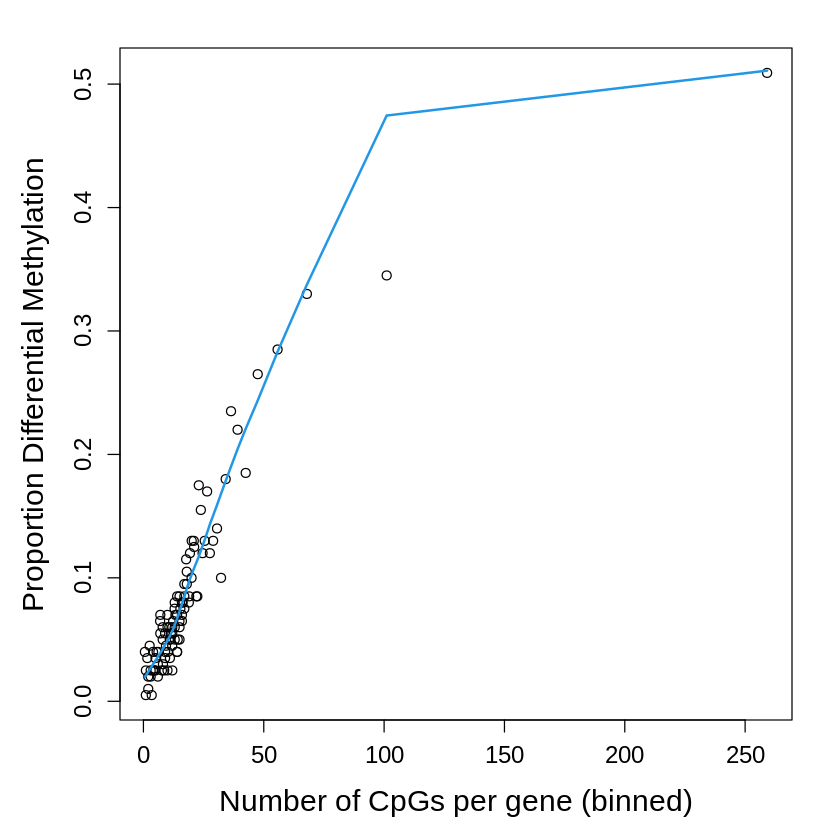

In [63]:
par(mfrow=c(1, 1))
gst <- gometh(sig.cpg=sigCpGs, all.cpg=all, plot.bias=T)

In [ ]:
order(gst, gst$FDR, gst$TERM)[1:10]

In [67]:
load(paste(dataDirectory, 'human_c2_v5.rdata', sep='/'))
gsa <- gsameth(sig.cpg = sigCpGs, all.cpg=all, collection=Hs.c2)

All input CpGs are used for testing.



In [68]:
topGSA(gsa, number=10)

,N,DE,P.DE,FDR
,<dbl>,<dbl>,<dbl>,<dbl>
ZHENG_BOUND_BY_FOXP3,477,137,3.125894e-28,1.475735e-24
JAATINEN_HEMATOPOIETIC_STEM_CELL_DN,217,59,1.489989e-16,3.517119e-13
MARTENS_BOUND_BY_PML_RARA_FUSION,449,107,2.762135e-14,4.346680e-11
SMID_BREAST_CANCER_NORMAL_LIKE_UP,439,92,3.877689e-14,4.576643e-11
PILON_KLF1_TARGETS_DN,1895,257,5.564846e-12,5.254328e-09
LEE_EARLY_T_LYMPHOCYTE_DN,54,25,1.578418e-11,1.241952e-08
MARSON_BOUND_BY_FOXP3_UNSTIMULATED,1180,163,2.508328e-10,1.691688e-07
ZHENG_FOXP3_TARGETS_IN_THYMUS_UP,191,51,3.691950e-10,2.178712e-07
REACTOME_IMMUNE_SYSTEM,835,124,8.330144e-10,4.369624e-07


## Differential Variability

testing for differences between group variances. for eg, it's been hypothesised that highly variable CpGs in cancer. may contribute to tumour heterogeneity. hence we may be interested in CpG sites that are consistently methlyated in one group, but variably methylated in another group

sample size is an important consideration when testing for differentially variable CpG sites. In oder to get an accurate estimate of the group variances, larger sample sizes are required than for estimating group means

In [75]:
load(paste(dataDirectory,"ageData.RData",sep="/"))


In [79]:
age.detP <- detectionP(age.rgSet)

#age.mSetSq <- preprocessQuantile(age.rgSet)


ERROR: ignored

In [ ]:
# add sex information to targets information
age.targets$Sex <- getSex(age.mSetSq)$predictedSex

# ensure probes are in the same order in the mSetSq and detP objects
age.detP <- age.detP[match(featureNames(age.mSetSq), rownames(age.detP)),]

# remove poor quality